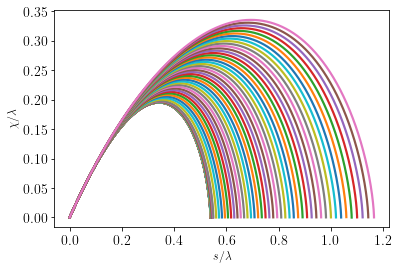

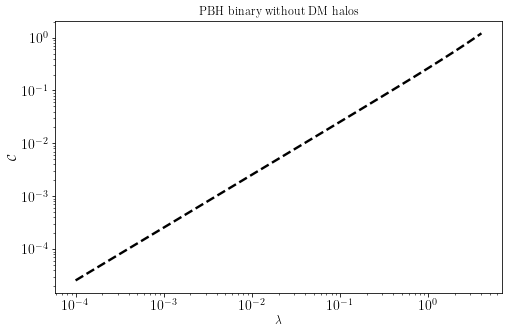

In [1]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries without dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(14) using eq.(6) for PBH binaries without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".


#Variation of  C with λ for the PBH binary without DM halos.

#Reference notes "Merger rate of PBH binary without DM halos".

#C is dimensionless.

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from module import *
from matplotlib import rcParams


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})




#Function to calculate scale factor at which the PBHs cross each other for the first time in  
# the binary.
def s_osc_nohalos(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        B=(Bs[i])
        d=As[i]
        if B<0:
            break
    D=d*λ_0        
    return D

s_nohalo_list=np.zeros(len(λ_list))  
for k, λ_0 in enumerate(λ_list):
    s_nohalo_list[k] = s_osc_nohalos(λ_0) #s at which the PBHs cross each other for the first time in  
                                     # the binary.



def H(s):
    return ((s**4)*h(s))



# Eq.(23) in "Merger rate of PBH binary without DM halos".       
def angular_momentum_nohalos(λ_0,s):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0 = [1e-12,1]
    b = (3*λ_0)/100000
    ss = np.linspace(1e-12,s,1000000) 
    us = odeint(f,separation0,ss,args=( λ_0,))
    separations = us[:,0]
    As  = ss/λ_0
    Bs = separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/\lambda$',fontsize=12)
    plt.ylabel('$\chi/\lambda$',fontsize=12)
    χ = separations**2
    χ_list = χ.tolist()
    s_list = ss.tolist()
    H_list = np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand = ( χ_list / H_list)
    integral = np.trapz(integrand, s_list)
    return integral
     

    
l_nohalo_list=np.zeros(len(λ_list))
for i, (λ_0,s) in enumerate(zip(λ_list,s_nohalo_list)):
    l_nohalo_list[i] = angular_momentum_nohalos(λ_0,s)

    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_nohalo_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$\lambda $',fontsize=12)
plt.ylabel('$\mathcal{C}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.show()   

p=  
0.01131 x + 0.2552


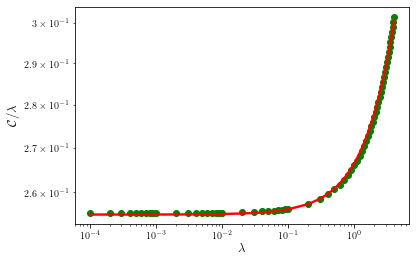

Maximum Percentage error= 0.3788 %


In [2]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_nohalo_list) 
Y = np.array(y/x)

z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)

plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')
plt.yscale('log')
plt.xlabel('$\lambda$',fontsize=13)
plt.ylabel('$\mathcal{C}/\lambda$',fontsize=13)
plt.show()



#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary without dark matter halos.
Y_list = Y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100

error_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_list,q_list)):
    error_list[i] = percentage_error(Y, q)    #Percentage error 

error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

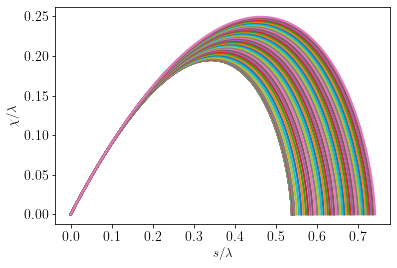

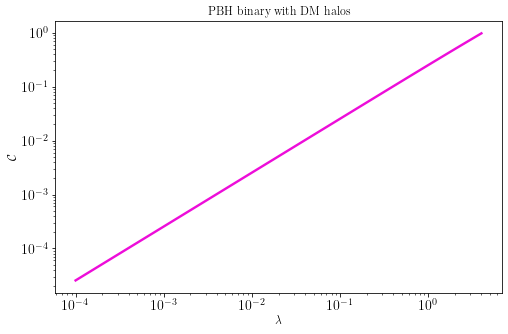

In [3]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries with dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(56) using extended mass function in reference pdf "Angular momentum 
#  in the PBH binary".

#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# around matter-radiation equality.





#Function to calculate scale factor at which the PBHs cross each other for the first time in  
# the binary.
def s_osc_withhalos(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        B=(Bs[i])
        d=As[i]
        if B<0:
            break
    D=d*λ_0        
    return D

s_withhalo_list=np.zeros(len(λ_list))  
for k, λ_0 in enumerate(λ_list):
    s_withhalo_list[k] = s_osc_withhalos(λ_0) #s at which the PBHs cross each other for the first time in  
                                     # the binary.


        

# Eq.(40) in "Merger rate of PBH binary with DM halos".
def angular_momentum_withhalos(λ_0,s):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0 = [1e-12,1]
    b = (3*λ_0)/100000
    ss = np.linspace(1e-12,s,1000000)
    us = odeint(f,separation0,ss,args=( λ_0,))
    separations = us[:,0]
    As = ss/λ_0
    Bs = separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/\lambda$',fontsize=13)
    plt.ylabel('$\chi/\lambda$',fontsize=13)
    χ = separations**2
    χ_list = χ.tolist()
    s_list = ss.tolist()
    H_list = np.zeros(len(s_list))
    
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        
    integrand = (χ_list / H_list)
    
    integral = np.trapz(integrand , s_list)    
        
    
    return integral
    

l_withhalo_list=np.zeros(len(λ_list))
for i, (λ_0,s) in enumerate(zip(λ_list,s_withhalo_list)):
    l_withhalo_list[i] = angular_momentum_withhalos(λ_0,s)

    
    
plt.rc('lines', linewidth=2.4)
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_withhalo_list,'#ED0DD9')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$\lambda$',fontsize=12)
plt.ylabel('$\mathcal{C}$',fontsize=12)
plt.title('PBH binary with DM halos') 
plt.show()

p=  
-0.002887 x + 0.2553


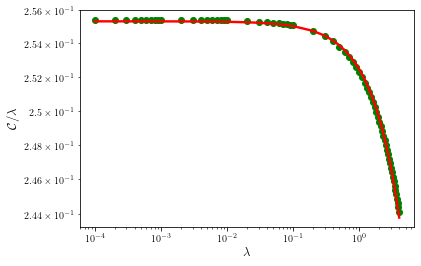

Maximum Percentage error= 0.1391 %


In [4]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary with dark matter 
# halos.

x_halo = np.array(λ_list)
y_halo = np.array(l_withhalo_list) 
Y_halo = np.array(y_halo/x_halo)



z = np.polyfit(x_halo, Y_halo, 1)
p_halo = np.poly1d(z)
print("p=",p_halo)

plt.loglog(x_halo,Y_halo,'go')
plt.plot(x_halo,p_halo(x_halo),'r')
plt.yscale('log')
plt.xlabel('$\lambda$',fontsize=13)
plt.ylabel('$\mathcal{C}/\lambda$',fontsize=13)
plt.show()


#Calculation of the Maximum Percentage error in the numerical and fitted value of l^{´}/λ for
#PBH binary with dark matter halos.

Y_halo_list = Y_halo.tolist()
q_halo= np.array(p_halo(x_halo))
q_halo_list=q_halo.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100

error_halo_list=np.zeros(len(λ_list))

for i, (Y,q) in enumerate(zip(Y_halo_list,q_halo_list)):
    error_halo_list[i] = percentage_error(Y, q)    #Percentage error 


error_halo_max=np.max(error_halo_list)
print("Maximum Percentage error= "'%0.4f'%error_halo_max,"%")

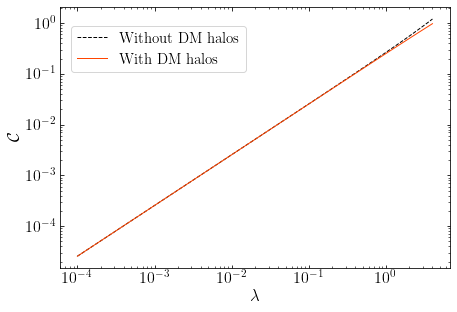

In [5]:
#Variation of l^{'} with λ for the PBH binaries with and without DM halos decoupling 
# upto matter-radiation equality.

plt.figure(figsize=(7,4.8))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'serif'
plt.tick_params(which='both', right=True, top=True)

plt.rc('lines', linewidth=1)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.loglog(λ_list,l_nohalo_list,'k--')
plt.loglog(λ_list, l_withhalo_list,'#FF4500')

plt.xlabel('$\lambda$',fontsize=17)
plt.ylabel('$\mathcal{C}$',fontsize=17)

plt.legend(["Without DM halos","With DM halos"],prop = {'size':15}, facecolor = 'white',
           loc=(0.03,0.75), shadow = False,fontsize=100) 

plt.savefig("Cvslambda.pdf", bbox_inches="tight")
plt.show()